### 000000 playground

##### Playground

In [122]:
ticker = '688188'

In [123]:
%%html
<style>
table {float:left}
</style>

In [124]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [126]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,2.96,2.96,"376,070,956 ( 53.3%)","157,283,183 ( 34.7%)","246,310,755 ( 76.9%)"
2018-12-31,1.86,1.86,"245,264,063 ( 16.6%)","116,778,231 ( 43.0%)","139,276,294 ( 6.2%)"
2017-12-31,NaN,NaN,"210,378,378 ( 72.2%)","81,665,522 ( 65.9%)","131,092,122 ( 74.4%)"
2016-12-31,NaN,NaN,"122,203,296 ( nan%)","49,227,424 ( nan%)","75,167,155 ( nan%)"


In [127]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"164,635,550 ( 59.4%)","136,507,662 ( 87.7%)"
2020-06-30,"144,479,219 ( 41.4%)","87,687,848 ( 41.2%)"
2020-03-31,"76,151,176 ( 4.9%)","52,295,174 ( -7.0%)"
2019-12-31,"98,044,212 ( 67.6%)","55,288,181 (160.6%)"
2019-09-30,"103,269,164 ( 72.4%)","72,725,969 ( 75.1%)"
2019-06-30,"102,157,961 ( 36.0%)","62,089,490 ( 33.6%)"
2019-03-31,"72,599,620 ( 40.4%)","56,207,115 ( 87.1%)"
2018-12-31,"58,485,454 ( nan%)","21,219,514 ( nan%)"
2018-09-30,"59,917,179 ( nan%)","41,527,819 ( nan%)"


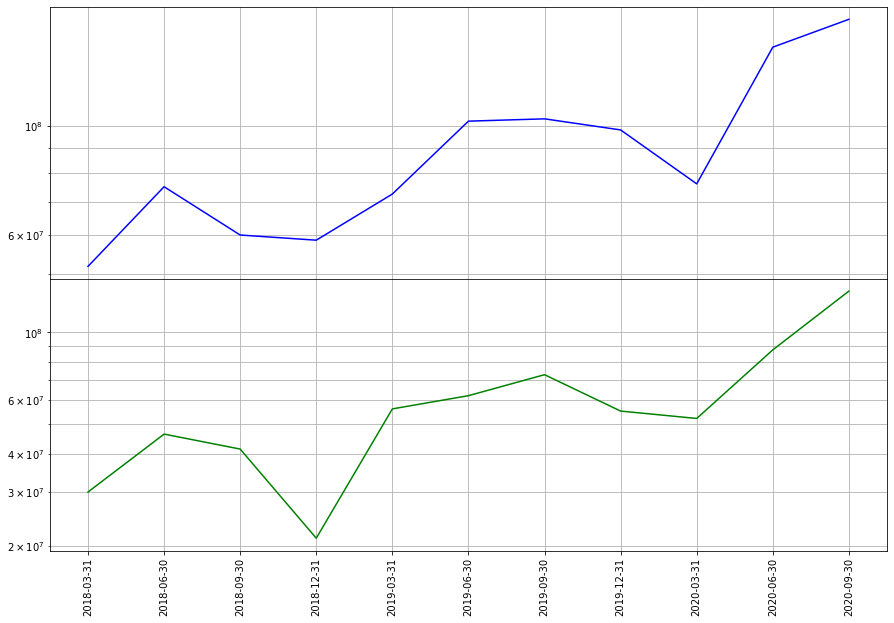

In [128]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [129]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,81.5,65.5
2018-12-31,81.2,56.8
2017-12-31,81.9,62.3
2016-12-31,81.9,61.5


In [130]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"376,070,956 ( 53.3%)","25,703,765 ( 63.3%)","8,514,824 (169.8%)","22,165,313 ( 59.6%)"
2018-12-31,"245,264,063 ( 16.6%)","15,741,720 ( 16.7%)","3,155,683 (-24.1%)","13,889,285 ( 51.1%)"
2017-12-31,"210,378,378 ( 72.2%)","13,489,499 ( 65.6%)","4,157,163 ( -4.8%)","9,189,782 (115.0%)"
2016-12-31,"122,203,296 ( nan%)","8,148,232 ( nan%)","4,365,655 ( nan%)","4,273,835 ( nan%)"


In [131]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权         滚动市盈率        前复权增长
       first    last   min    max      
交易日期                                   
2019  242.68  156.45  55.4  134.7 -35.5
2020  157.80  248.33  51.1   97.8  57.4

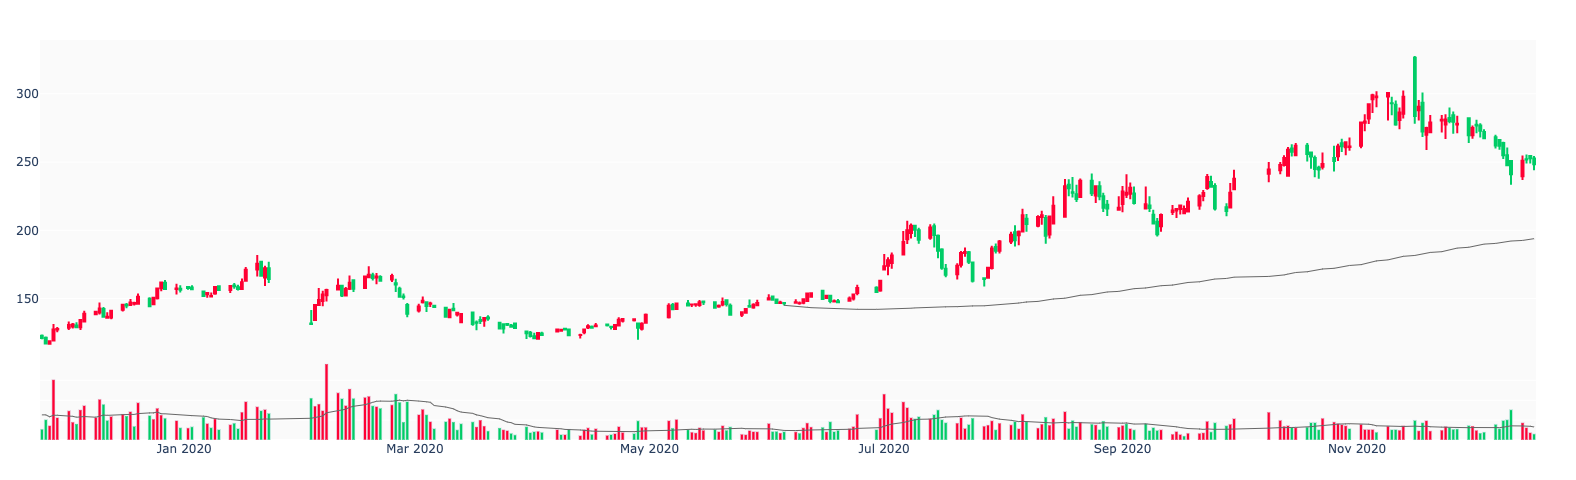

In [132]:
draw(mkt, 260, 200, 20)